In [47]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pylab as plt
import seaborn as sns; sns.set()

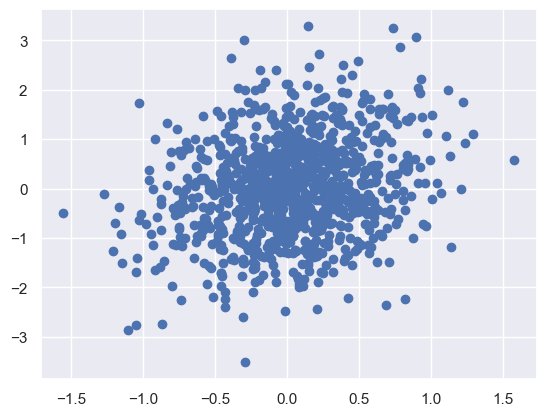

In [56]:
# パラメータ
num_samples = 1000
num_epochs = 10000
learning_rate = 0.001

# 2次元のガウス分布からデータを生成
mean = np.array([0.0, 0.0])
cov = np.array([[0.2, 0.1], [0.1, 1.0]])
data = np.random.multivariate_normal(mean, cov, num_samples)

# データをTensorに変換
data = torch.tensor(data, dtype=torch.float32)

# データにノイズを追加
noise = torch.randn_like(data)
noisy_data = data + noise

plt.plot(data[:, 0], data[:, 1], 'bo')

In [57]:
# ニューラルネットワークを定義
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 2)
)

# 最適化アルゴリズムと損失関数を定義
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()



In [58]:
# モデルを訓練

history = []

for epoch in range(num_epochs):
    # ネットワークを通じてノイズのあるデータを逆伝播
    predicted_data = model(noisy_data)

    # 損失を計算し、バックプロパゲーションを実行
    loss = loss_fn(predicted_data, data)

    history.append(np.float64(loss))

    optimizer.zero_grad()
    loss.backward()

    # パラメータを更新
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


Epoch 100/10000, Loss: 0.3833160400390625
Epoch 200/10000, Loss: 0.3291020393371582
Epoch 300/10000, Loss: 0.31105369329452515
Epoch 400/10000, Loss: 0.3075815737247467
Epoch 500/10000, Loss: 0.3064984679222107
Epoch 600/10000, Loss: 0.305754691362381
Epoch 700/10000, Loss: 0.3050704002380371
Epoch 800/10000, Loss: 0.3041953146457672
Epoch 900/10000, Loss: 0.30319640040397644
Epoch 1000/10000, Loss: 0.30218449234962463
Epoch 1100/10000, Loss: 0.3014829158782959
Epoch 1200/10000, Loss: 0.3009669780731201
Epoch 1300/10000, Loss: 0.3005274832248688
Epoch 1400/10000, Loss: 0.3001231849193573
Epoch 1500/10000, Loss: 0.2997439205646515
Epoch 1600/10000, Loss: 0.299406498670578
Epoch 1700/10000, Loss: 0.29906177520751953
Epoch 1800/10000, Loss: 0.29865172505378723
Epoch 1900/10000, Loss: 0.29840362071990967
Epoch 2000/10000, Loss: 0.2981652021408081
Epoch 2100/10000, Loss: 0.2979370653629303
Epoch 2200/10000, Loss: 0.2976439893245697
Epoch 2300/10000, Loss: 0.29729771614074707
Epoch 2400/1000

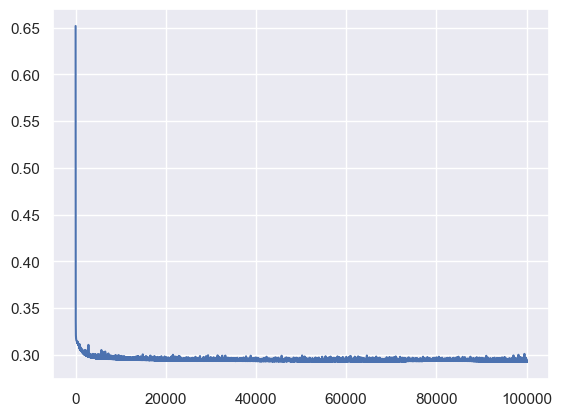

In [52]:
plt.plot(history)

In [53]:
# モデルを使用して新しいデータを生成
new_noise = torch.randn(num_samples, 2)
generated_data = model(new_noise).detach().numpy()

# 実際のデータと生成されたデータを比較
print("Actual data: ", data[:5])
print("Generated data: ", generated_data[:5])

Actual data:  tensor([[ 0.1428,  0.9633],
        [-0.8561, -0.6605],
        [-0.1033, -0.2362],
        [-0.4245,  0.9400],
        [-0.5716, -1.1367]])
Generated data:  [[ 0.22053204  0.39619115]
 [ 0.34472576  1.1962348 ]
 [ 0.09683811  0.1872164 ]
 [ 0.15712556  0.0111509 ]
 [ 0.09751895 -0.23412263]]


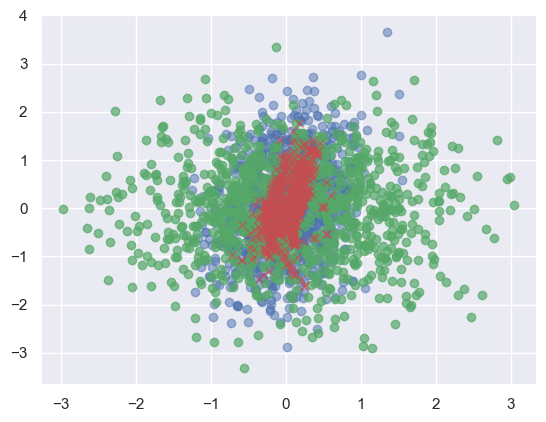

In [55]:
plt.plot(data[:, 0], data[:, 1], 'bo', alpha=0.5)
plt.plot(new_noise[:, 0], new_noise[:, 1], 'go', alpha=0.7)
plt.plot(generated_data[:, 0], generated_data[:, 1], 'rx', alpha=0.7)